In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported successfully")

Libraries imported successfully


In [3]:
df = pd.read_csv('../data/processed/modeling_dataset.csv')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

print(f"Dataset Shape: {df.shape}")
print(f"Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"Total Months: {len(df)}")

print("\n=== Column Names ===")
print(df.columns.tolist())

print("\n=== First 10 Rows ===")
df.head(10)

Dataset Shape: (48, 7)
Date Range: 2020-01-01 00:00:00 to 2023-12-01 00:00:00
Total Months: 48

=== Column Names ===
['date', 'cpi_food', 'price_beras_lokal', 'price_telur_ayam_ras', 'price_cabai_merah', 'price_bawang_merah', 'usd_idr']

=== First 10 Rows ===


,date,cpi_food,price_beras_lokal,price_telur_ayam_ras,price_cabai_merah,price_bawang_merah,usd_idr
0,2020-01-01,105.89,10050.00,25063.00,37097.00,37133.00,13800.89
1,2020-02-01,106.90,10083.00,23269.00,40222.00,32625.00,13845.03
2,2020-03-01,107.01,10083.00,21831.00,47694.00,30279.00,15270.55
3,2020-04-01,107.11,10083.00,23738.00,46444.00,39014.00,15946.77
4,2020-05-01,106.77,10083.00,23894.00,46897.00,44345.00,14980.72
5,2020-06-01,107.27,10021.00,26615.00,44220.00,49124.00,14266.93
6,2020-07-01,106.49,10000.00,26887.00,38951.00,39067.00,14655.32
7,2020-08-01,105.57,10000.00,26813.00,40441.00,32333.00,14798.12
8,2020-09-01,105.18,10000.00,26719.00,40997.00,29083.00,14922.20
9,2020-10-01,105.49,10000.00,24300.00,55333.00,32200.00,14822.88


In [4]:
print("=== DATA INFO ===")
print(df.info())

print("\n=== SUMMARY STATISTICS ===")
df.describe().round(2)

=== DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  48 non-null     datetime64[ns]
 1   cpi_food              48 non-null     float64       
 2   price_beras_lokal     48 non-null     float64       
 3   price_telur_ayam_ras  48 non-null     float64       
 4   price_cabai_merah     48 non-null     float64       
 5   price_bawang_merah    48 non-null     float64       
 6   usd_idr               48 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.8 KB
None

=== SUMMARY STATISTICS ===


,date,cpi_food,price_beras_lokal,price_telur_ayam_ras,price_cabai_merah,price_bawang_merah,usd_idr
count,48,48.00,48.00,48.00,48.00,48.00,48.00
mean,2021-12-15 23:00:00,113.36,10504.54,26980.02,47107.25,34127.56,14817.99
min,2020-01-01 00:00:00,105.18,10000.00,21134.00,37097.00,24750.00,13800.89
25%,2020-12-24 06:00:00,108.41,10000.00,25759.75,44492.25,29839.25,14405.33
50%,2021-12-16 12:00:00,111.50,10000.00,27007.00,47004.00,33035.50,14780.07
75%,2022-12-08 18:00:00,119.30,10124.75,28426.25,48923.75,38370.00,15218.86
max,2023-12-01 00:00:00,125.10,14343.00,31413.00,55778.00,50286.00,15946.77
std,NaN,6.11,1129.09,2554.95,4513.18,6019.04,540.82


In [5]:
print("=== MISSING VALUES ===")
missing = df.isnull().sum()
print(missing)

if missing.sum() > 0:
    print("\n⚠️  Warning: Missing values detected!")
    missing_pct = (missing / len(df)) * 100
    for col in missing[missing > 0].index:
        print(f"  {col}: {missing[col]} ({missing_pct[col]:.1f}%)")
else:
    print("\nNo missing values!")

=== MISSING VALUES ===
date                    0
cpi_food                0
price_beras_lokal       0
price_telur_ayam_ras    0
price_cabai_merah       0
price_bawang_merah      0
usd_idr                 0
dtype: int64

No missing values!


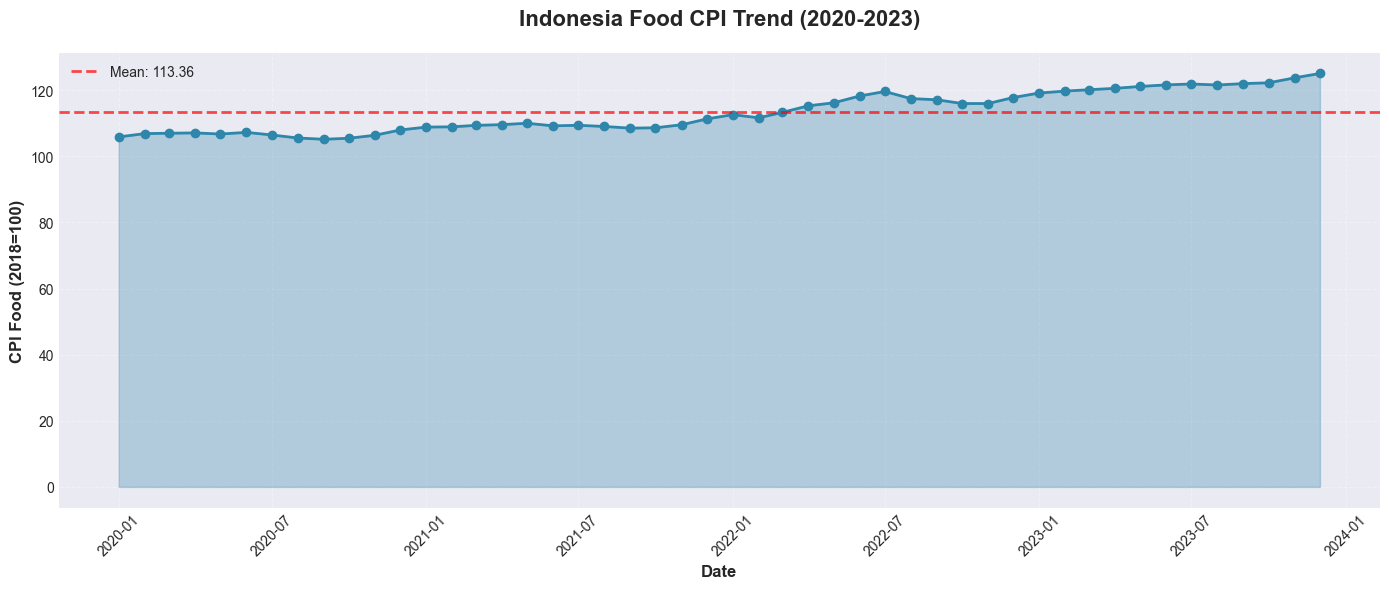

Plot saved to: ../reports/figures/food_cpi_trend.png

CPI Food Statistics:
   Mean: 113.36
   Min: 105.18 (2020-09)
   Max: 125.10 (2023-12)
   Range: 19.92


In [6]:
import os
os.makedirs('../reports/figures', exist_ok=True)

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['date'], df['cpi_food'], marker='o', linewidth=2, markersize=6, color='#2E86AB')
ax.fill_between(df['date'], df['cpi_food'], alpha=0.3, color='#2E86AB')

ax.set_title('Indonesia Food CPI Trend (2020-2023)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('CPI Food (2018=100)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.axhline(y=df['cpi_food'].mean(), color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Mean: {df["cpi_food"].mean():.2f}')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/figures/food_cpi_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved to: ../reports/figures/food_cpi_trend.png")
print(f"\nCPI Food Statistics:")
print(f"   Mean: {df['cpi_food'].mean():.2f}")
print(f"   Min: {df['cpi_food'].min():.2f} ({df[df['cpi_food'] == df['cpi_food'].min()]['date'].dt.strftime('%Y-%m').values[0]})")
print(f"   Max: {df['cpi_food'].max():.2f} ({df[df['cpi_food'] == df['cpi_food'].max()]['date'].dt.strftime('%Y-%m').values[0]})")
print(f"   Range: {df['cpi_food'].max() - df['cpi_food'].min():.2f}")

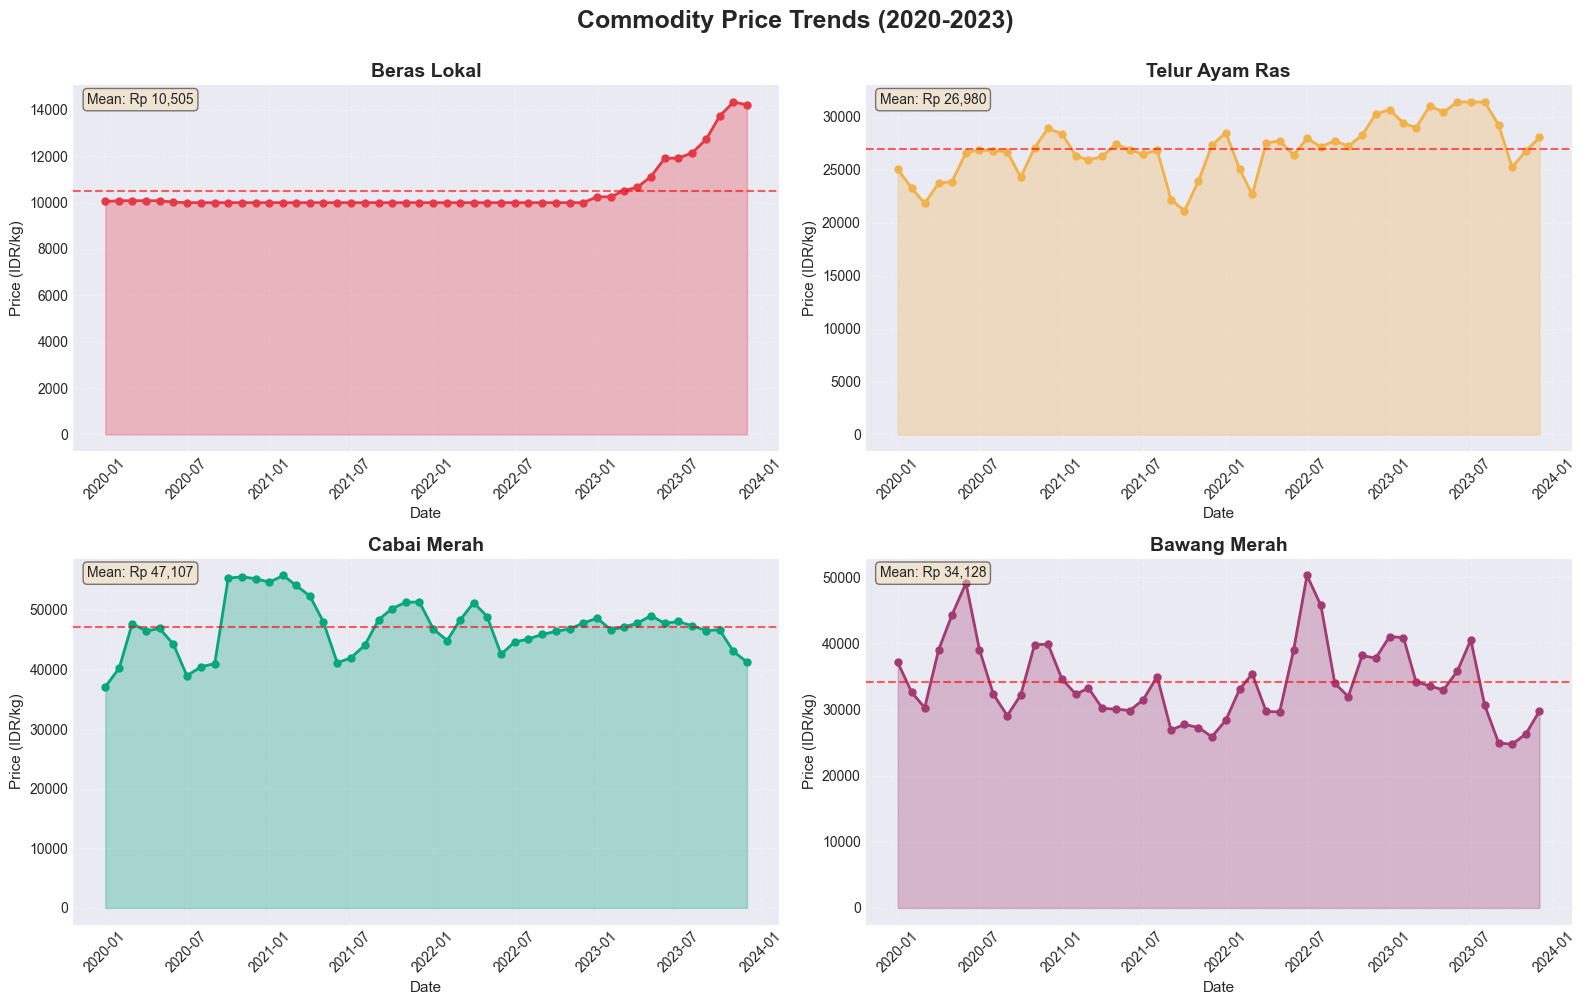

Plot saved to: ../reports/figures/price_trends.png


In [7]:
price_cols = [col for col in df.columns if 'price_' in col]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Commodity Price Trends (2020-2023)', fontsize=18, fontweight='bold', y=1.00)

colors = ['#E63946', '#F1B24A', '#06A77D', '#A23B72']

for idx, col in enumerate(price_cols):
    row = idx // 2
    col_idx = idx % 2
    ax = axes[row, col_idx]
    
    # Clean column name for title
    title = col.replace('price_', '').replace('_', ' ').title()
    
    # Plot
    ax.plot(df['date'], df[col], marker='o', linewidth=2, markersize=5, color=colors[idx])
    ax.fill_between(df['date'], df[col], alpha=0.3, color=colors[idx])
    
    # Formatting
    ax.set_title(f'{title}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=11)
    ax.set_ylabel('Price (IDR/kg)', fontsize=11)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.axhline(y=df[col].mean(), color='red', linestyle='--', linewidth=1.5, alpha=0.6)
    
    # Add statistics
    mean_val = df[col].mean()
    ax.text(0.02, 0.98, f'Mean: Rp {mean_val:,.0f}', 
            transform=ax.transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.savefig('../reports/figures/price_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved to: ../reports/figures/price_trends.png")

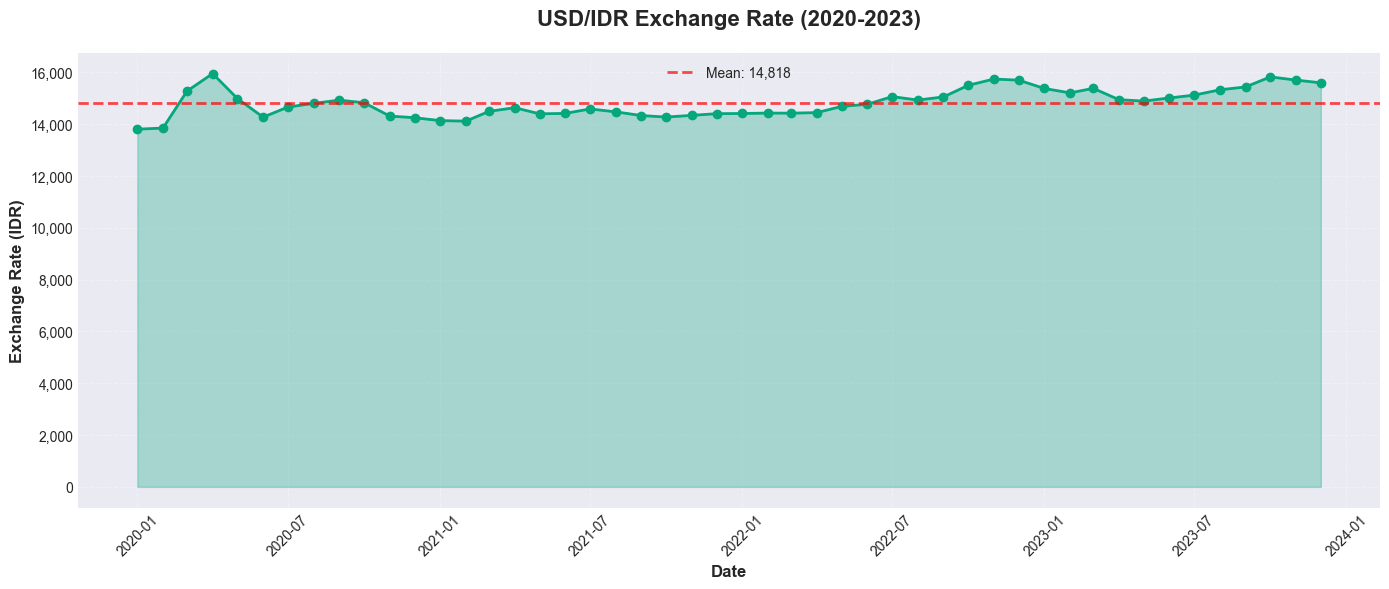

Plot saved to: ../reports/figures/usd_idr_trend.png

USD/IDR Statistics:
   Mean: Rp 14,817.99
   Min: Rp 13,800.89 (2020-01)
   Max: Rp 15,946.77 (2020-04)


In [8]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['date'], df['usd_idr'], marker='o', linewidth=2, markersize=6, color='#06A77D')
ax.fill_between(df['date'], df['usd_idr'], alpha=0.3, color='#06A77D')

ax.set_title('USD/IDR Exchange Rate (2020-2023)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Exchange Rate (IDR)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.axhline(y=df['usd_idr'].mean(), color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Mean: {df["usd_idr"].mean():,.0f}')
ax.legend()

# Format y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/figures/usd_idr_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved to: ../reports/figures/usd_idr_trend.png")
print(f"\nUSD/IDR Statistics:")
print(f"   Mean: Rp {df['usd_idr'].mean():,.2f}")
print(f"   Min: Rp {df['usd_idr'].min():,.2f} ({df[df['usd_idr'] == df['usd_idr'].min()]['date'].dt.strftime('%Y-%m').values[0]})")
print(f"   Max: Rp {df['usd_idr'].max():,.2f} ({df[df['usd_idr'] == df['usd_idr'].max()]['date'].dt.strftime('%Y-%m').values[0]})")

=== PRICE VOLATILITY (Coefficient of Variation) ===

Beras Lokal              : CV = 10.75%
Telur Ayam Ras           : CV = 9.47%
Cabai Merah              : CV = 9.58%
Bawang Merah             : CV = 17.64%


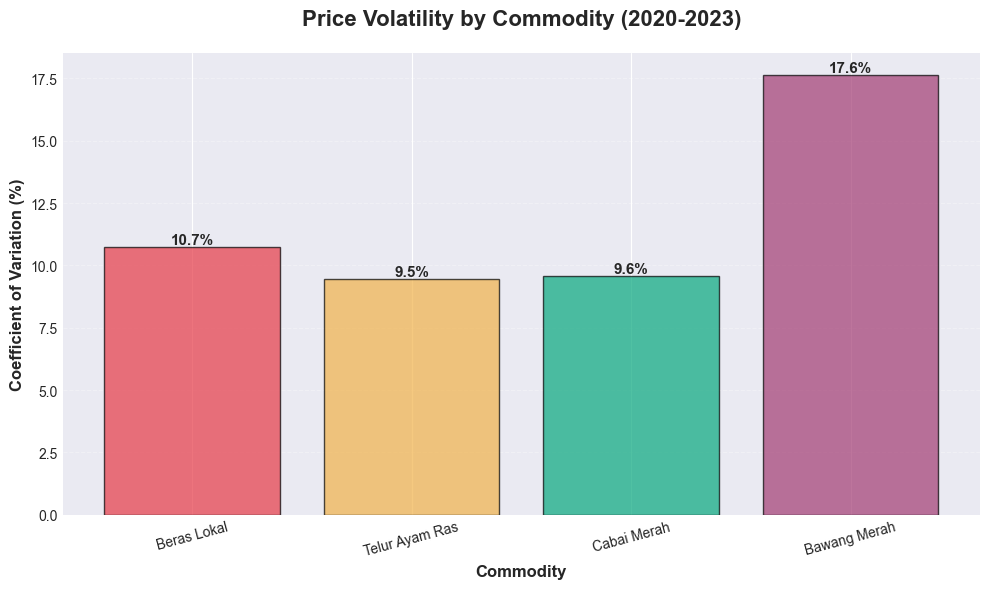


Plot saved to: ../reports/figures/price_volatility.png

Interpretation:
   Highest volatility: Bawang Merah (17.6%)
   Lowest volatility: Telur Ayam Ras (9.5%)


In [9]:
print("=== PRICE VOLATILITY (Coefficient of Variation) ===\n")

volatility = {}
for col in price_cols:
    mean = df[col].mean()
    std = df[col].std()
    cv = (std / mean) * 100
    volatility[col] = cv
    
    clean_name = col.replace('price_', '').replace('_', ' ').title()
    print(f"{clean_name:25s}: CV = {cv:.2f}%")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))

commodities = [col.replace('price_', '').replace('_', ' ').title() for col in price_cols]
cv_values = [volatility[col] for col in price_cols]

bars = ax.bar(commodities, cv_values, color=['#E63946', '#F1B24A', '#06A77D', '#A23B72'], alpha=0.7, edgecolor='black')

# Add value labels on bars
for bar, val in zip(bars, cv_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_title('Price Volatility by Commodity (2020-2023)', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Coefficient of Variation (%)', fontsize=12, fontweight='bold')
ax.set_xlabel('Commodity', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y', linestyle='--')

plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('../reports/figures/price_volatility.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nPlot saved to: ../reports/figures/price_volatility.png")
print(f"\nInterpretation:")
print(f"   Highest volatility: {commodities[cv_values.index(max(cv_values))]} ({max(cv_values):.1f}%)")
print(f"   Lowest volatility: {commodities[cv_values.index(min(cv_values))]} ({min(cv_values):.1f}%)")

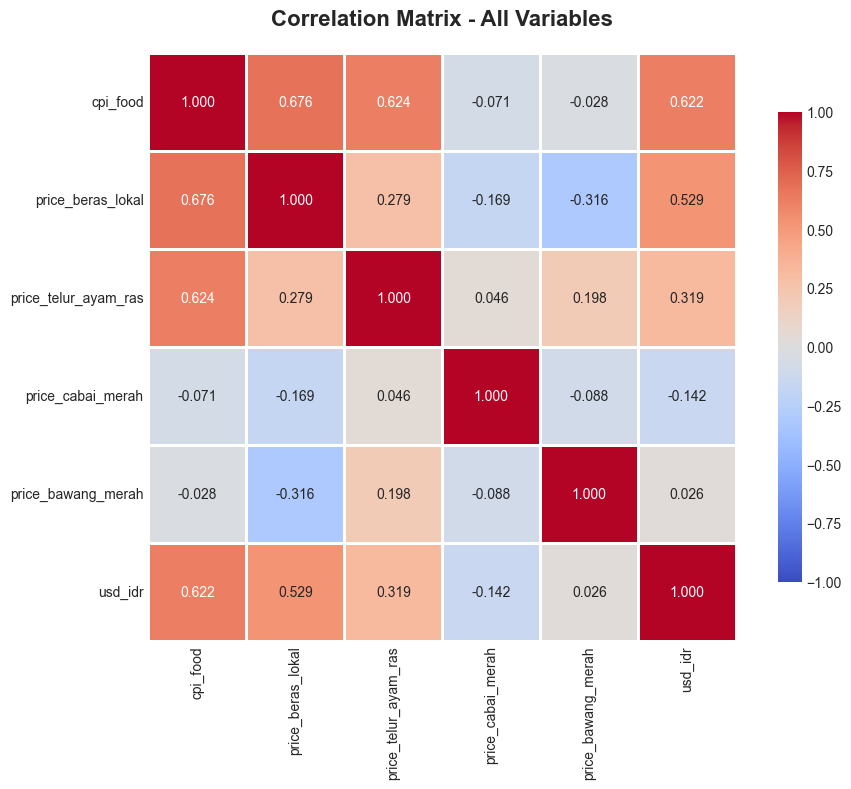

Plot saved to: ../reports/figures/correlation_matrix.png

=== CORRELATION WITH CPI FOOD (Target) ===
cpi_food                1.00
price_beras_lokal       0.68
price_telur_ayam_ras    0.62
usd_idr                 0.62
price_bawang_merah     -0.03
price_cabai_merah      -0.07
Name: cpi_food, dtype: float64

Key Insights:
   price_beras_lokal: 0.676 (Moderate positive)
   price_telur_ayam_ras: 0.624 (Moderate positive)
   usd_idr: 0.622 (Moderate positive)
   price_bawang_merah: -0.028 (Weak negative)
   price_cabai_merah: -0.071 (Weak negative)


In [10]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax)

ax.set_title('Correlation Matrix - All Variables', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../reports/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved to: ../reports/figures/correlation_matrix.png")

print("\n=== CORRELATION WITH CPI FOOD (Target) ===")
cpi_corr = corr_matrix['cpi_food'].sort_values(ascending=False)
print(cpi_corr)

print("\nKey Insights:")
for col in cpi_corr.index:
    if col != 'cpi_food':
        corr_val = cpi_corr[col]
        strength = "Strong" if abs(corr_val) > 0.7 else "Moderate" if abs(corr_val) > 0.4 else "Weak"
        direction = "positive" if corr_val > 0 else "negative"
        print(f"   {col}: {corr_val:.3f} ({strength} {direction})")

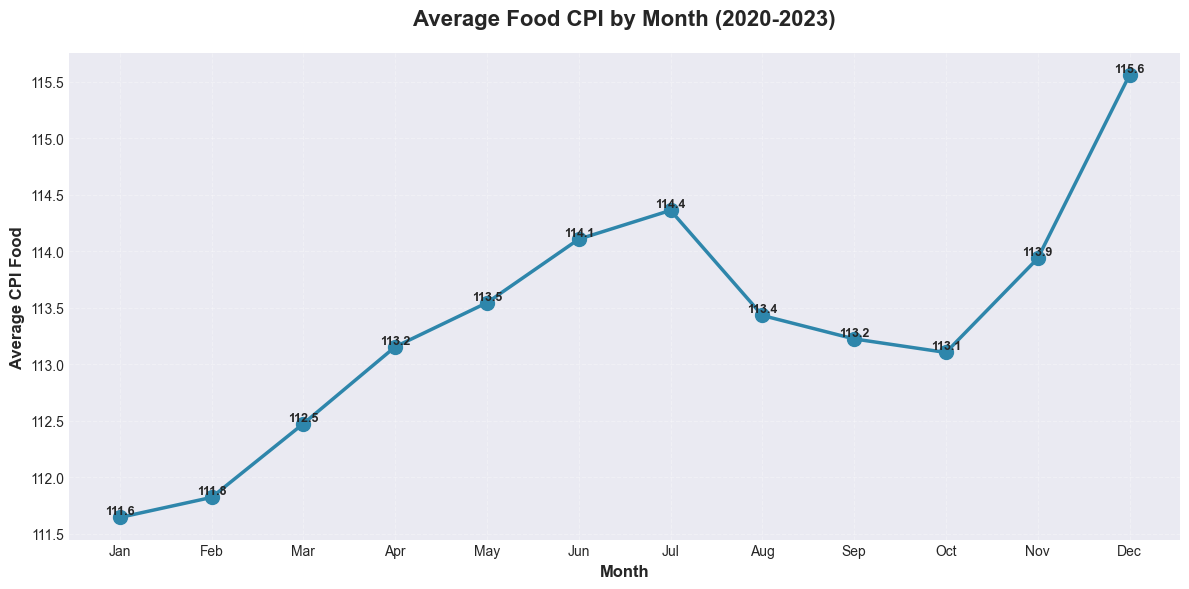

Plot saved to: ../reports/figures/seasonal_pattern.png

=== MONTHLY AVERAGES ===
   month_name  cpi_food
0         Jan    111.64
1         Feb    111.82
2         Mar    112.47
3         Apr    113.16
4         May    113.55
5         Jun    114.11
6         Jul    114.36
7         Aug    113.43
8         Sep    113.22
9         Oct    113.10
10        Nov    113.94
11        Dec    115.56

Potential Seasonal Effects:
   Highest avg month: Dec (115.56)
   Lowest avg month: Jan (111.64)


In [11]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%b')

# Calculate average CPI by month (across all years)
monthly_avg = df.groupby('month')['cpi_food'].mean().reset_index()
monthly_avg['month_name'] = pd.to_datetime(monthly_avg['month'], format='%m').dt.strftime('%b')

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(monthly_avg['month_name'], monthly_avg['cpi_food'], 
        marker='o', linewidth=2.5, markersize=10, color='#2E86AB')

ax.set_title('Average Food CPI by Month (2020-2023)', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('Average CPI Food', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')

# Add value labels
for i, row in monthly_avg.iterrows():
    ax.text(i, row['cpi_food'], f"{row['cpi_food']:.1f}", 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/seasonal_pattern.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved to: ../reports/figures/seasonal_pattern.png")

print("\n=== MONTHLY AVERAGES ===")
print(monthly_avg[['month_name', 'cpi_food']])

# Identify potential Ramadan months
print("\nPotential Seasonal Effects:")
print(f"   Highest avg month: {monthly_avg.loc[monthly_avg['cpi_food'].idxmax(), 'month_name']} ({monthly_avg['cpi_food'].max():.2f})")
print(f"   Lowest avg month: {monthly_avg.loc[monthly_avg['cpi_food'].idxmin(), 'month_name']} ({monthly_avg['cpi_food'].min():.2f})")

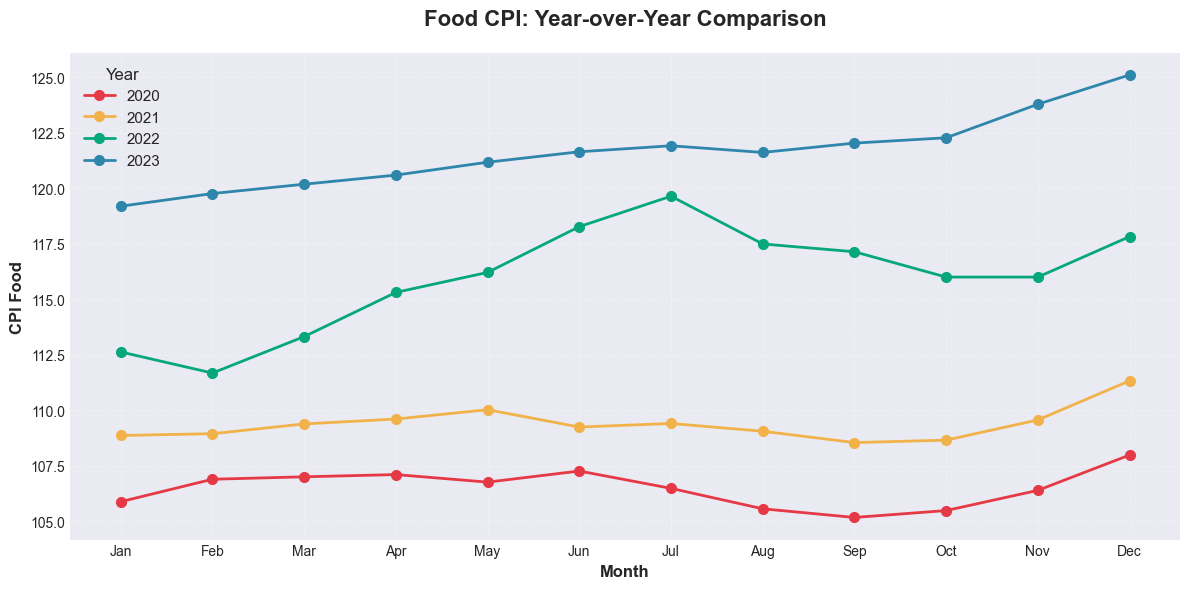

Plot saved to: ../reports/figures/yoy_comparison.png

=== YEAR-OVER-YEAR GROWTH ===
year
2020   106.51
2021   109.39
2022   115.96
2023   121.60
Name: cpi_food, dtype: float64

Yearly growth rates:
   2020 → 2021: +2.71%
   2021 → 2022: +6.01%
   2022 → 2023: +4.87%


In [12]:
df_pivot = df.pivot_table(values='cpi_food', index='month', columns='year')

fig, ax = plt.subplots(figsize=(12, 6))

colors_year = ['#E63946', '#F1B24A', '#06A77D', '#2E86AB']
for i, year in enumerate(df_pivot.columns):
    ax.plot(df_pivot.index, df_pivot[year], 
            marker='o', linewidth=2, markersize=7, label=year, color=colors_year[i])

ax.set_title('Food CPI: Year-over-Year Comparison', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Month', fontsize=12, fontweight='bold')
ax.set_ylabel('CPI Food', fontsize=12, fontweight='bold')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.legend(title='Year', fontsize=11, title_fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('../reports/figures/yoy_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved to: ../reports/figures/yoy_comparison.png")

print("\n=== YEAR-OVER-YEAR GROWTH ===")
yearly_avg = df.groupby('year')['cpi_food'].mean()
print(yearly_avg)
print("\nYearly growth rates:")
for i in range(1, len(yearly_avg)):
    growth = ((yearly_avg.iloc[i] - yearly_avg.iloc[i-1]) / yearly_avg.iloc[i-1]) * 100
    print(f"   {yearly_avg.index[i-1]} → {yearly_avg.index[i]}: {growth:+.2f}%")

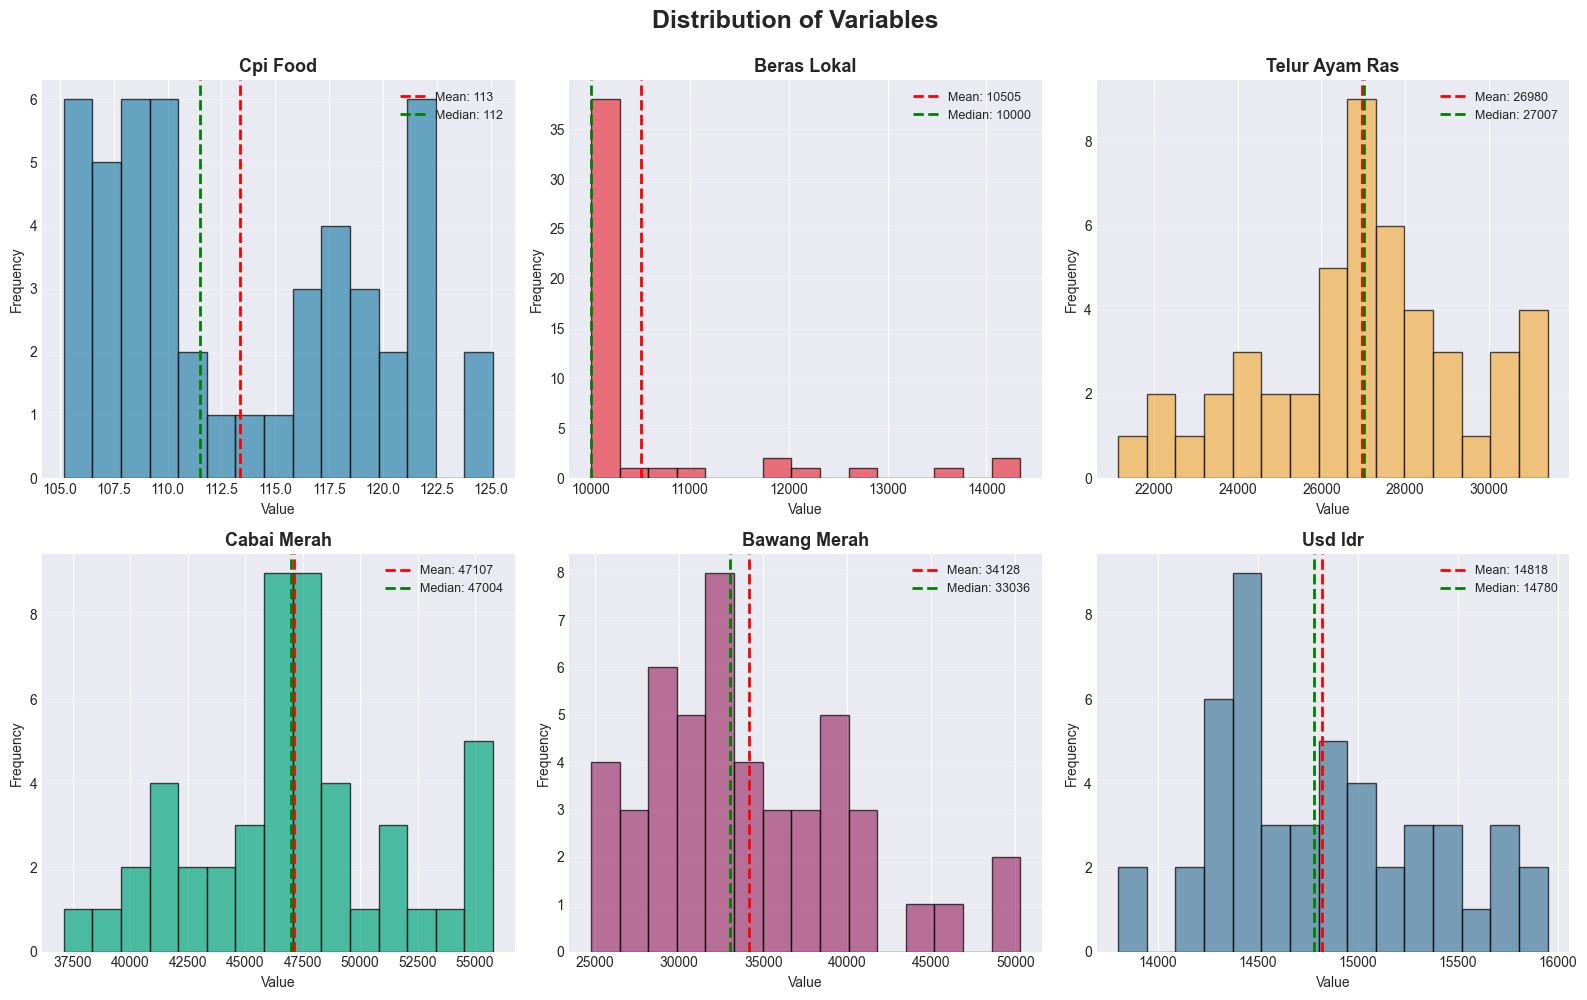

Plot saved to: ../reports/figures/distributions.png


In [13]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribution of Variables', fontsize=18, fontweight='bold', y=0.995)

# Variables to plot
vars_to_plot = ['cpi_food'] + price_cols + ['usd_idr']
colors_dist = ['#2E86AB', '#E63946', '#F1B24A', '#06A77D', '#A23B72', '#457B9D']

for idx, col in enumerate(vars_to_plot):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    # Histogram with KDE
    ax.hist(df[col], bins=15, alpha=0.7, color=colors_dist[idx], edgecolor='black')
    ax.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.0f}')
    ax.axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.0f}')
    
    # Title
    title = col.replace('price_', '').replace('_', ' ').title()
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../reports/figures/distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved to: ../reports/figures/distributions.png")

In [14]:
print("="*80)
print("EXPLORATORY DATA ANALYSIS SUMMARY")
print("="*80)

print("\nDATASET OVERVIEW")
print(f"   Period: {df['date'].min().strftime('%Y-%m')} to {df['date'].max().strftime('%Y-%m')}")
print(f"   Total Months: {len(df)}")
print(f"   Variables: {len(df.columns) - 3}")  # Exclude date, year, month

print("\nCPI FOOD (Target Variable)")
print(f"   Mean: {df['cpi_food'].mean():.2f}")
print(f"   Std Dev: {df['cpi_food'].std():.2f}")
print(f"   Min: {df['cpi_food'].min():.2f}")
print(f"   Max: {df['cpi_food'].max():.2f}")
print(f"   Range: {df['cpi_food'].max() - df['cpi_food'].min():.2f}")

print("\nCOMMODITY PRICE VOLATILITY (CV%)")
for col in price_cols:
    cv = (df[col].std() / df[col].mean()) * 100
    name = col.replace('price_', '').replace('_', ' ').title()
    print(f"   {name:25s}: {cv:.2f}%")

print("\nCORRELATION WITH CPI FOOD")
for col in numeric_cols:
    if col != 'cpi_food':
        corr = df[['cpi_food', col]].corr().iloc[0, 1]
        print(f"   {col:25s}: {corr:+.3f}")

print("\n" + "="*80)
print("EDA COMPLETED")
print("="*80)
print("\nNext Steps:")
print("   1. Feature engineering (lags, Ramadan flag)")
print("   2. Build baseline model")
print("   3. Build regression models")
print("   4. Evaluate and compare models")

EXPLORATORY DATA ANALYSIS SUMMARY

DATASET OVERVIEW
   Period: 2020-01 to 2023-12
   Total Months: 48
   Variables: 7

CPI FOOD (Target Variable)
   Mean: 113.36
   Std Dev: 6.11
   Min: 105.18
   Max: 125.10
   Range: 19.92

🌾 COMMODITY PRICE VOLATILITY (CV%)
   Beras Lokal              : 10.75%
   Telur Ayam Ras           : 9.47%
   Cabai Merah              : 9.58%
   Bawang Merah             : 17.64%

🔗 CORRELATION WITH CPI FOOD
   price_beras_lokal        : +0.676
   price_telur_ayam_ras     : +0.624
   price_cabai_merah        : -0.071
   price_bawang_merah       : -0.028
   usd_idr                  : +0.622

EDA COMPLETED

Next Steps:
   1. Feature engineering (lags, Ramadan flag)
   2. Build baseline model
   3. Build regression models
   4. Evaluate and compare models


In [15]:
insights = {
    'dataset_period': f"{df['date'].min().strftime('%Y-%m')} to {df['date'].max().strftime('%Y-%m')}",
    'total_months': len(df),
    'cpi_mean': df['cpi_food'].mean(),
    'cpi_std': df['cpi_food'].std(),
    'cpi_range': df['cpi_food'].max() - df['cpi_food'].min(),
    'most_volatile_commodity': max(volatility, key=volatility.get).replace('price_', '').replace('_', ' ').title(),
    'highest_correlation': cpi_corr.index[1],  # Second item (first is cpi_food itself)
    'highest_correlation_value': cpi_corr.iloc[1]
}

print("=== KEY INSIGHTS SUMMARY ===")
for key, value in insights.items():
    print(f"{key}: {value}")

print("\nEDA notebook completed successfully!")
print("All visualizations saved to: ../reports/figures/")

=== KEY INSIGHTS SUMMARY ===
dataset_period: 2020-01 to 2023-12
total_months: 48
cpi_mean: 113.364375
cpi_std: 6.112555932389964
cpi_range: 19.919999999999987
most_volatile_commodity: Bawang Merah
highest_correlation: price_beras_lokal
highest_correlation_value: 0.6756049891594313

EDA notebook completed successfully!
All visualizations saved to: ../reports/figures/
